# Pymaceuticals Inc.
---

### Analysis

From the sample testing, we can see that the sample size of each category is very similar and it is tesing on both the male and female mouse,we could see that this group of test is pretty obejective.

According to the summary, we can see using Ramicane treatment is resulting less of the tumor volume and its sample does not very much, meaning that the treatment result is similar to different mouse.

Frome the outliers, we can see we have an outlier in testing group using Infubinol, and it is quite different from the other samples within the same group, meaning that this treatment is not showing consistence results and we need to do more tests to find out what is causing it.

In [289]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import statistics


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])
# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [290]:
# Checking the number of mice.
count_mouse=len(mouse_data_complete["Mouse ID"].unique())

In [291]:
count_mouse

249

In [292]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data_complete[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [293]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data=mouse_data_complete[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

In [294]:
duplicated_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [295]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
#clean_data=mouse_data_complete.drop(mouse_data_complete.loc[mouse_data_complete['Mouse ID']=="g989"].index, inplace=True)
clean_data=mouse_data_complete.drop(mouse_data_complete.loc[mouse_data_complete['Mouse ID']=="g989"].index)

In [296]:
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [297]:
# Checking the number of mice in the clean DataFrame.
count_new=len(clean_data["Mouse ID"].unique())

In [298]:
# Checking the number of mice in the clean DataFrame.
count_new

248

In [299]:
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [300]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: drug_mean=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_median=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_var=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_sd=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_sem=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
drug_summary= pd.DataFrame({
    "mean": drug_mean,
    "median": drug_median,
    "var": drug_var,
    "std": drug_sd,
    "sem":drug_sem,
})
drug_summary



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [301]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_summary_new=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()
drug_summary_new

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

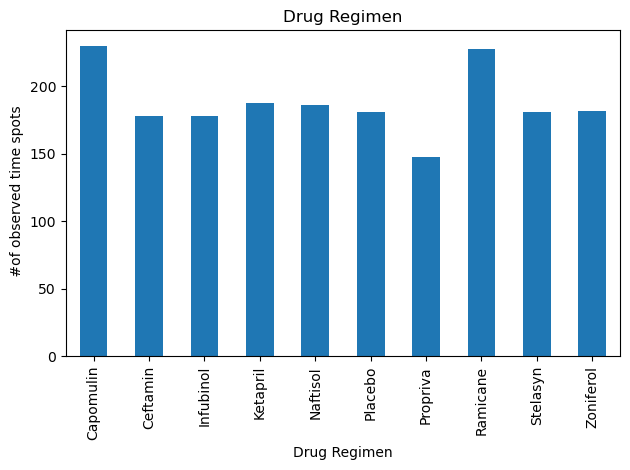

In [302]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugregimen_groups =clean_data.groupby("Drug Regimen")["Mouse ID"].count()

patron_chart = drugregimen_groups.plot(kind="bar", title="Drug Regimen")
patron_chart.set_xlabel("Drug Regimen")
patron_chart.set_ylabel(" #of observed time spots")

plt.tight_layout()
plt.show()

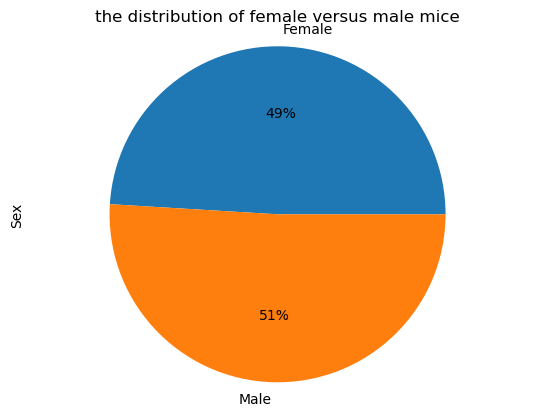

In [303]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
drugregimen_sex_groups =clean_data.groupby("Sex")["Mouse ID"].count()
sex_pie = drugregimen_sex_groups.plot(kind="pie", y='Sex', autopct='%1.0f%%', title=("the distribution of female versus male mice"))
sex_pie.set_ylabel("Sex")

plt.axis("equal")
plt.show()

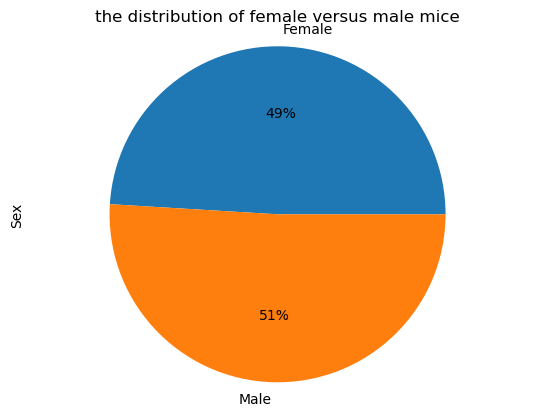

In [304]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
drugregimen_sex_groups =clean_data.groupby("Sex")["Mouse ID"].count()
sex_pie = drugregimen_sex_groups.plot(kind="pie", y='Sex', autopct='%1.0f%%', title=("the distribution of female versus male mice"))
sex_pie.set_ylabel("Sex")

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [305]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Treatment1="Capomulin"
Treatment2="Ramicane"
Treatment3="Infubinol"
Treatment4="Ceftamin"
# Start by getting the last (greatest) timepoint for each mouse
Drug_Regimen_last=clean_data.groupby("Mouse ID")["Timepoint"].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Drug_Regimen_final=pd.merge(Drug_Regimen_last,clean_data, on=['Mouse ID','Timepoint'],how='inner',suffixes=['_and'])
#Drug_Regimen_final


In [306]:
Drug_Regimen_final

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [307]:

# Put treatments into a list for for loop (and later for plot labels)
Treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]
#tomour_volume=Drug_Regimen_final.groupby("Drug Regimen")["Tumor Volume (mm3)"]

df_Capomulin=Drug_Regimen_final.loc[Drug_Regimen_final["Drug Regimen"]=="Capomulin"]
tumor_vol_Capomulin=df_Capomulin["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#For Treatment in Treatments
quartiles_Capomulin = tumor_vol_Capomulin.quantile([.25,.5,.75])
lowerq_Capomulin = quartiles_Capomulin[0.25]
upperq_Capomulin = quartiles_Capomulin[0.75]
iqr_Capomulin = upperq_Capomulin-lowerq_Capomulin
lower_bound_Capomulin = lowerq_Capomulin - (1.5*iqr_Capomulin)
upper_bound_Capomulin = upperq_Capomulin + (1.5*iqr_Capomulin)
outlier__Capomulin= tumor_vol_Capomulin.loc[(tumor_vol_Capomulin<lower_bound_Capomulin)|(tumor_vol_Capomulin>upper_bound_Capomulin)]


In [308]:
outlier__Capomulin

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [309]:
df_Ramicane=Drug_Regimen_final.loc[Drug_Regimen_final["Drug Regimen"]=="Ramicane"]
tumor_vol_Ramicane=df_Ramicane["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#For Treatment in Treatments
quartiles_Ramicane = tumor_vol_Ramicane.quantile([.25,.5,.75])
lowerq_Ramicane = quartiles_Ramicane[0.25]
upperq_Ramicane = quartiles_Ramicane[0.75]
iqr_Ramicane = upperq_Ramicane-lowerq_Ramicane
lower_bound_Ramicane = lowerq_Ramicane - (1.5*iqr_Ramicane)
upper_bound_Ramicane = upperq_Ramicane + (1.5*iqr_Ramicane)
   
outlier__lower_bound_Ramicane=tumor_vol_Ramicane.loc[(tumor_vol_Ramicane<lower_bound_Ramicane)|(tumor_vol_Ramicane>upper_bound_Ramicane)]


In [310]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outlier__lower_bound_Ramicane

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [311]:
df_Infubinol=Drug_Regimen_final.loc[Drug_Regimen_final["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
quartiles_Infubinol = df_Infubinol.quantile([.25,.5,.75])
lowerq_Infubinol = quartiles_Infubinol[0.25]
upperq_Infubinol = quartiles_Infubinol[0.75]
iqr_Infubinol = upperq_Infubinol-lowerq_Infubinol
lower_bound_Infubinol= lowerq_Infubinol - (1.5*iqr_Infubinol)
upper_bound_Infubinol= upperq_Infubinol + (1.5*iqr_Infubinol)
outlier_Infubinol= df_Infubinol.loc[(df_Infubinol<lower_bound_Infubinol)|(df_Infubinol>upper_bound_Infubinol)]

In [312]:
outlier_Infubinol

31    36.321346
Name: Tumor Volume (mm3), dtype: float64

In [314]:
df_Ceftamin=Drug_Regimen_final.loc[Drug_Regimen_final["Drug Regimen"]=="Ceftamin"]
tumor_vol_Ceftamin=df_Ceftamin["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#For Treatment in Treatments
quartiles_Ceftamin = tumor_vol_Ceftamin.quantile([.25,.5,.75])
lowerq_Ceftamin = quartiles_Ceftamin[0.25]
upperq_Ceftamin = quartiles_Ceftamin[0.75]
iqr_Ceftamin = upperq_Ceftamin-lowerq_Ceftamin
lower_bound_Ceftamin= lowerq_Ceftamin - (1.5*iqr_Ceftamin)
upper_bound_Ceftamin = upperq_Ceftamin + (1.5*iqr_Ceftamin)

outlier_Ceftamin= tumor_vol_Ceftamin.loc[(tumor_vol_Ceftamin<lower_bound_Ceftamin)|(tumor_vol_Ceftamin>upper_bound_Ceftamin)]

In [ ]:
outlier_Ceftamin

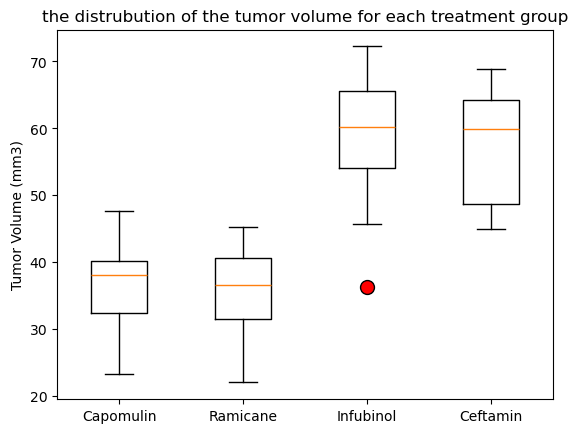

In [315]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol=[tumor_vol_Capomulin,tumor_vol_Ramicane,df_Infubinol,tumor_vol_Ceftamin]
tumor_vol
fig1, ax1 = plt.subplots()
ax1.set_title('the distrubution of the tumor volume for each treatment group')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol,flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])
plt.show()

## Line and Scatter Plots

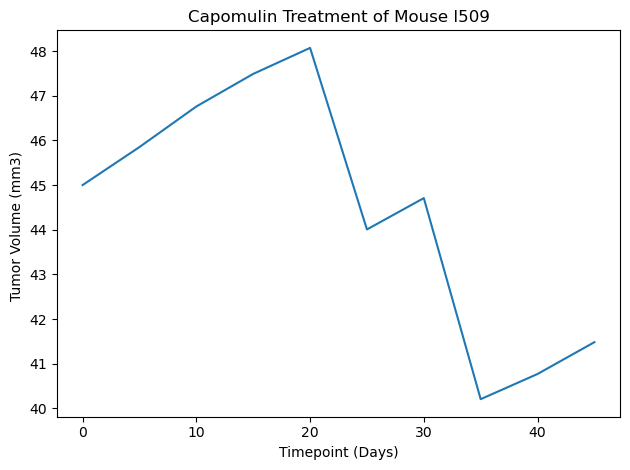

In [316]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df_Capomulin_complete=clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"]
mouse_l509=df_Capomulin_complete[(df_Capomulin_complete["Mouse ID"]=="l509")]
mouse_reduce = mouse_l509.set_index(["Timepoint"])["Tumor Volume (mm3)"]
mouse_reduce_chart=mouse_reduce.plot(kind="line")
mouse_reduce_chart.set_xlabel("Timepoint (Days)")
mouse_reduce_chart.set_ylabel("Tumor Volume (mm3) ")

# Set a title for the chart
plt.title("Capomulin Treatment of Mouse l509")

plt.tight_layout()
plt.show()


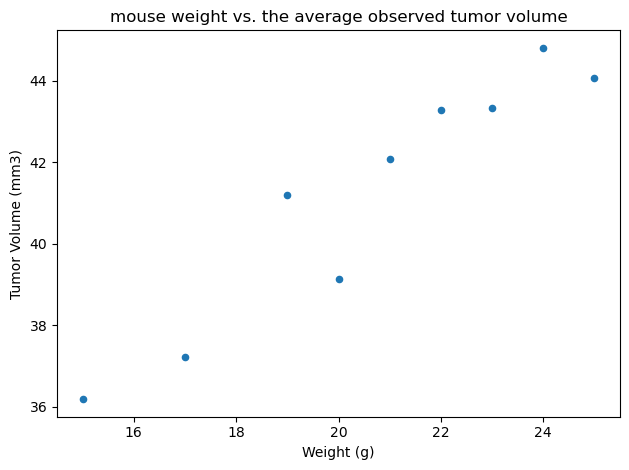

In [317]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight=df_Capomulin_complete.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
mouse_weight_df = mouse_weight.reset_index("Weight (g)")
mouse_weight_df

mouse_weight_df_chart= mouse_weight_df.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind="scatter")
mouse_weight_df_chart.set_xlabel("Weight (g)")
mouse_weight_df_chart.set_ylabel("Tumor Volume (mm3)")

# Set a title for the chart
plt.title("mouse weight vs. the average observed tumor volume")

plt.tight_layout()
plt.show()


In [ ]:
mouse_weight

## Correlation and Regression

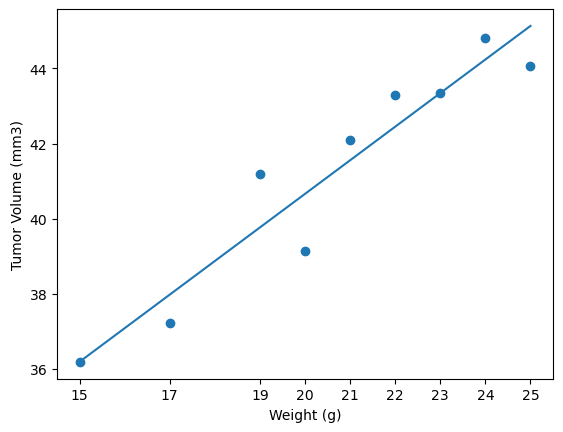

In [324]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
Weight=mouse_weight_df['Weight (g)']
Average_Tumor_Volume=mouse_weight_df['Tumor Volume (mm3)']
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(Weight, Average_Tumor_Volume)
p_fit = p_slope * Weight + p_int
plt.scatter(Weight,Average_Tumor_Volume)
plt.plot(Weight,p_fit,"-")
plt.xticks(Weight)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [325]:
p_slope

0.8947726097340629